# Exercise 3

Group Members: Luis Pazos Clemens, Robert Freund, Eugen Dizer

Deadline: 15.12.2020, 16:00.

In [1]:
#Load standard libraries
import numpy as np   
import matplotlib.pyplot as plt   
%matplotlib inline

## 3 Data Preparation

In [2]:
#load library and data
from sklearn import datasets

digits = datasets.load_digits()
print ( digits.keys () )
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]
print ( data.dtype )

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
float64


In [3]:
#size of total dataset
print(np.shape(data))
print(np.shape(images))
print(np.shape(target))

(1797, 64)
(1797, 8, 8)
(1797,)


In [4]:
#split into training and test set
from sklearn import model_selection

X_train , X_test , Y_train , Y_test =\
model_selection.train_test_split( digits .data , digits . target , test_size = 0.4 , random_state = 0)

In [5]:
#choose numbers "1" and "3" only
X_train_1_3  = X_train[np.where((Y_train == 1) | (Y_train == 3))]
Y_train_1_3 = Y_train[np.where((Y_train == 1) | (Y_train == 3))]
X_test_1_3 = X_test[np.where((Y_test == 1) | (Y_test == 3))]
Y_test_1_3 = Y_test[np.where((Y_test == 1) | (Y_test == 3))]

In [6]:
#size of datasets with number "1" and "3" only
print(np.shape(X_train_1_3))
print(np.shape(Y_train_1_3))
print(np.shape(X_test_1_3))
print(np.shape(Y_test_1_3))

(222, 64)
(222,)
(143, 64)
(143,)


<Figure size 432x288 with 0 Axes>

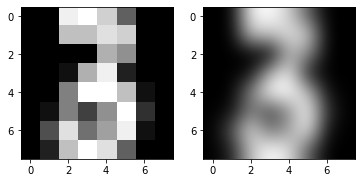

In [7]:
#plotting a test image

img = X_train_1_3[np.random.randint(0,np.shape(X_train_1_3)[0])].reshape(8,8) 
assert 2 == len( img.shape )
plt.figure ()
plt.gray ()
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img, interpolation ="nearest" )
axarr[1].imshow(img, interpolation ="bicubic")
plt.show ()

In [8]:
# fit_qda function from exercise 2:

def fit_qda(training_features, training_labels):
    """
    QDA fit function for arbitrary training size N and feature dimension D.

    params
    ------
    training_features : np.array shape=(N, D)
            training set for the classifier.
            rows: features x_i.
    training_labels : np.array shape=(N)
        Training labels for the classifier with "1" and "3".

    returns
    -------
    mu: np.array shape=(2, D)
        the two class means.
    covmat: np.array shape=(2, D, D)
        the two covariance matrices.
    p: np.array shape=(2)
        the two priors.
    """
    N = len(training_labels)
    #Sets that only contain class 1 and 3
    X0 = training_features[training_labels == 1]
    X1 = training_features[training_labels == 3]
    N0 = len(X0)
    N1 = len(X1)
    #Calculate the means
    mu_0 = np.mean(X0, axis=0)
    mu_1 = np.mean(X1, axis=0)
    #Calculate covariance matrices
    covmat_0 = np.matmul((X0 - mu_0).T, (X0 - mu_0)) / N0
    covmat_1 = np.matmul((X1 - mu_1).T, (X1 - mu_1)) / N1
    #Calculate the priors
    p_0 = N0 / N
    p_1 = N1 / N
    return np.array([mu_0, mu_1]), np.array([covmat_0, covmat_1]), np.array([p_0, p_1])

In [9]:
#Apply this function to our training data:

training_features = X_train_1_3
training_labels = Y_train_1_3

mu, covmat, p = fit_qda(training_features, training_labels)

In [10]:
#Generate 8 new insatces of each class using the mu and covmat obtained above:

gen_1 = np.random.multivariate_normal(mu[0],covmat[0],(8))
gen_3 = np.random.multivariate_normal(mu[1],covmat[1],(8))

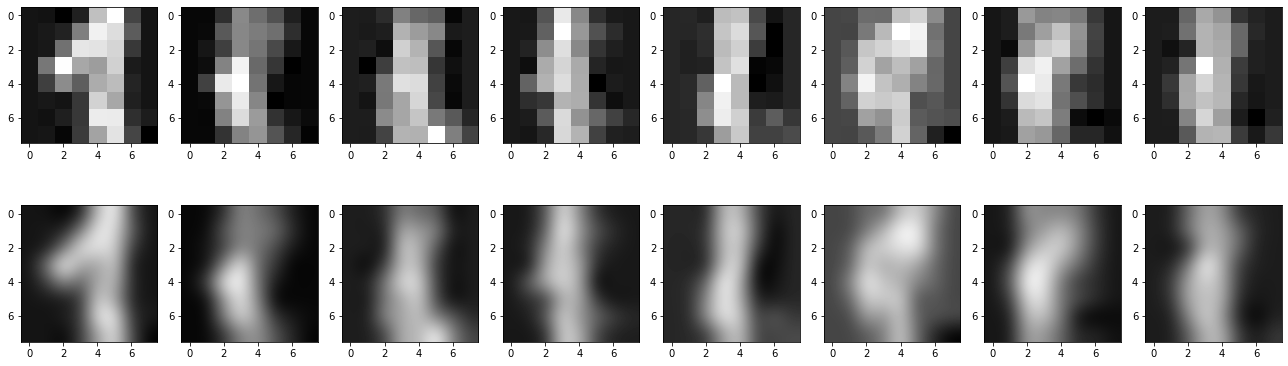

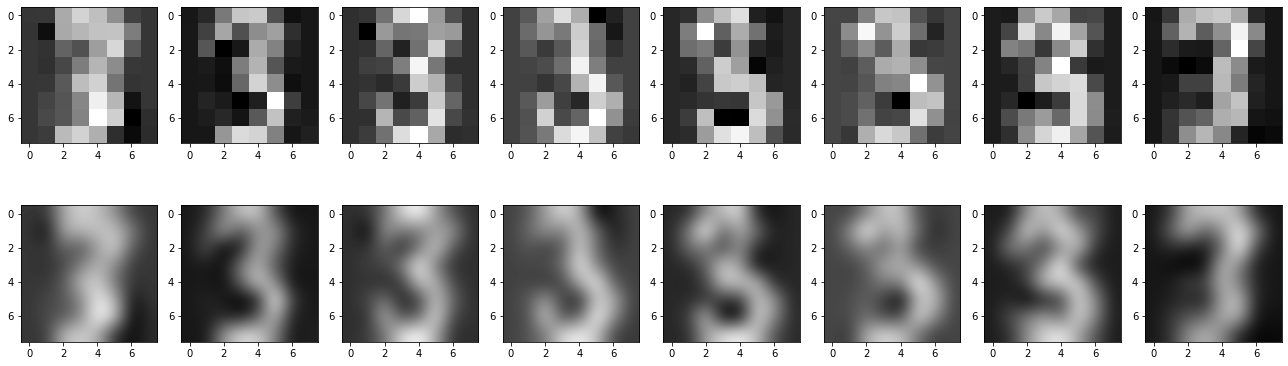

In [11]:
#Plot the generated instances:

#1s
fig=plt.figure(figsize=(18, 6))
axes=[]
for i in range(8):
    img = gen_1.reshape(8,8,8)[i]
    axes.append( fig.add_subplot(2, 8, i+1) )
    plt.imshow(img, interpolation ="nearest")
    axes.append( fig.add_subplot(2, 8, i+9) )
    plt.imshow(img, interpolation ="bicubic")
fig.tight_layout()    
plt.show()

#3s
fig=plt.figure(figsize=(18, 6))
axes=[]
for i in range(8):
    img = gen_3.reshape(8,8,8)[i]
    axes.append( fig.add_subplot(2, 8, i+1) )
    plt.imshow(img, interpolation ="nearest")
    axes.append( fig.add_subplot(2, 8, i+9) )
    plt.imshow(img, interpolation ="bicubic")
fig.tight_layout()    
plt.show()